**The Best Classifier Assignment**

In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [10]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [11]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [12]:
df.shape

(346, 10)

In [13]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [14]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

**1. Data visualization and pre-processing**

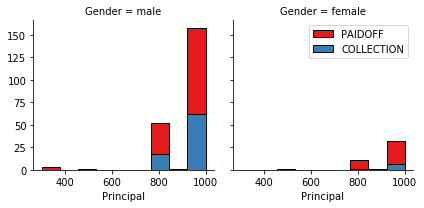

In [15]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

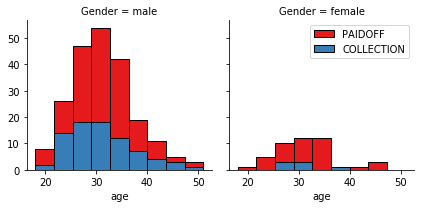

In [16]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

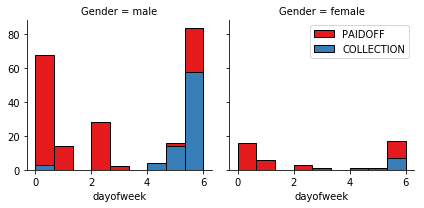

In [17]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [18]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [22]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [23]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [24]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [25]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [26]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

**2. Normalize Data**

In [28]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

**3. Classification**

-**K Nearest Neighbor(KNN)**

In [29]:
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [30]:
seed=50
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=seed)

In [31]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    predKNN=knn.predict(X_test)
    accuracy=metrics.accuracy_score(predKNN,y_test)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.6834532374100719
2 :  0.5755395683453237
3 :  0.7338129496402878
4 :  0.6762589928057554
5 :  0.7482014388489209
6 :  0.6762589928057554
7 :  0.7553956834532374
8 :  0.7050359712230215
9 :  0.7697841726618705
10 :  0.7338129496402878
11 :  0.7553956834532374
12 :  0.7194244604316546
13 :  0.7482014388489209
14 :  0.7338129496402878
15 :  0.7410071942446043
16 :  0.7338129496402878
17 :  0.7482014388489209
18 :  0.7338129496402878
19 :  0.7482014388489209
20 :  0.7266187050359713
21 :  0.762589928057554
22 :  0.7194244604316546
23 :  0.762589928057554
24 :  0.7482014388489209
25 :  0.762589928057554
26 :  0.762589928057554
27 :  0.762589928057554
28 :  0.762589928057554
29 :  0.762589928057554
30 :  0.762589928057554
31 :  0.7913669064748201
32 :  0.7769784172661871
33 :  0.7913669064748201
34 :  0.7913669064748201
35 :  0.7913669064748201
36 :  0.7985611510791367
37 :  0.7841726618705036
38 :  0.7913669064748201
39 :  0.7913669064748201
40 :  0.7841726618705036
41 :  0.834532374

In [32]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')

41  :  83.45 %


-**Results are K =41 and Accuracy + 83.45%**

Text(0, 0.5, 'Train Accuracy')

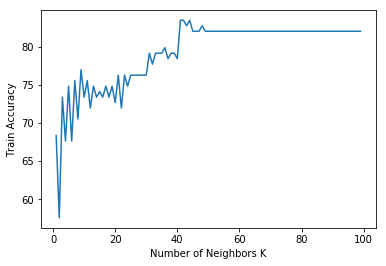

In [33]:
plt.plot(range(1,100),score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [34]:
knn=KNeighborsClassifier(n_neighbors=41,weights='uniform')
knn.fit(X_train,y_train)
predKNN=knn.predict(X_test)
accuracy=metrics.accuracy_score(predKNN,y_test)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  83.5 %


In [35]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,predKNN))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,predKNN)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,predKNN,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, knn.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.67      0.16      0.26        25
     PAIDOFF       0.84      0.98      0.91       114

   micro avg       0.83      0.83      0.83       139
   macro avg       0.75      0.57      0.58       139
weighted avg       0.81      0.83      0.79       139



Jaccard Similarity Score :  83.45 %


F1-SCORE :  [0.25806452 0.90688259]


Train Accuracy:  72.46376811594203 %


-**Decision Tree**

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()

In [50]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7439613526570048
Best params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'random_state': 0}


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [52]:
dtree=DecisionTreeClassifier(max_depth=5,criterion='entropy',max_features=2,random_state=0)

In [53]:
dtree.fit(X_train,y_train)
pred_Dtree=dtree.predict(X_test)

In [54]:
print(classification_report(y_test,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, dtree.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.32      0.40      0.36        25
     PAIDOFF       0.86      0.82      0.84       114

   micro avg       0.74      0.74      0.74       139
   macro avg       0.59      0.61      0.60       139
weighted avg       0.76      0.74      0.75       139



Jaccard Similarity Score :  74.1 %


F1-SCORE :  [0.35714286 0.83783784]


Train Accuracy:  77.29468599033817 %


**Support Vector Machine (SVM)**

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [69]:
pred_lgm=lgm.predict(X_test)
print(classification_report(y_test,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_lgm,average=None))
print('\n')
print('T

In [69]:
rain Accuracy: ',metrics.accuracy_score(y_train, lgm.predict(X_train))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.33      0.24      0.28        25
     PAIDOFF       0.84      0.89      0.87       114

   micro avg       0.78      0.78      0.78       139
   macro avg       0.59      0.57      0.57       139
weighted avg       0.75      0.78      0.76       139



Jaccard Similarity Score :  77.7 %


F1-SCORE :  [0.27906977 0.86808511]


Train Accuracy:  73.91304347826086 %


In [63]:
print(classification_report(y_test,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, svm.predict(X_train))*100,'%')

In [ ]:
svm=SVC().fit(X_train,y_train)
pred_svm=svm.predict(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression()
lgm.fit(X_train,y_train)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [72]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [73]:

test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [74]:

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [75]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

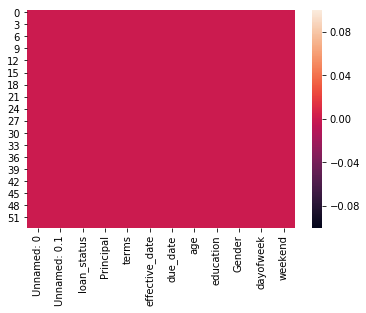

In [76]:
sns.heatmap(test_df.isnull())

In [77]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)


In [78]:
dumm=pd.get_dummies(test_df['education'])
#dumm=dumm.drop('Master or Above',axis=1,inplace=True)
dumm=dumm[['Bechalor','High School or Below','college']]

In [79]:

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,dumm], axis=1)
#test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [80]:

test_data= test_feature
test_data= preprocessing.StandardScaler().fit(test_data).transform(test_data)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
y_t=test_df['loan_status']

**KNN**

In [83]:
knn=KNeighborsClassifier()
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  74.1 %


In [84]:
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X,y)
    predKNN=knn.predict(test_data)
    accuracy=metrics.accuracy_score(predKNN,y_t)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.7037037037037037
2 :  0.5740740740740741
3 :  0.6481481481481481
4 :  0.6296296296296297
5 :  0.7407407407407407
6 :  0.6851851851851852
7 :  0.7222222222222222
8 :  0.7037037037037037
9 :  0.7037037037037037
10 :  0.6851851851851852
11 :  0.6851851851851852
12 :  0.6666666666666666
13 :  0.7037037037037037
14 :  0.7037037037037037
15 :  0.7222222222222222
16 :  0.7037037037037037
17 :  0.7222222222222222
18 :  0.7037037037037037
19 :  0.7222222222222222
20 :  0.7407407407407407
21 :  0.7592592592592593
22 :  0.7592592592592593
23 :  0.7592592592592593
24 :  0.7222222222222222
25 :  0.7407407407407407
26 :  0.7777777777777778
27 :  0.7592592592592593
28 :  0.7777777777777778
29 :  0.7592592592592593
30 :  0.7777777777777778
31 :  0.7407407407407407
32 :  0.7962962962962963
33 :  0.7777777777777778
34 :  0.7962962962962963
35 :  0.7962962962962963
36 :  0.7777777777777778
37 :  0.7962962962962963
38 :  0.7962962962962963
39 :  0.7962962962962963
40 :  0.7962962962962963
41 :  0.7

In [85]:
print(score.index(max(score))+1,' : ',round(max(score),2),'%')


32  :  79.63 %


In [86]:
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  79.60000000000001 %


In [87]:
print(classification_report(y_t,predKNN_test))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,predKNN_test)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,predKNN_test,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y,knn.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.71      0.36      0.48        14
     PAIDOFF       0.81      0.95      0.87        40

   micro avg       0.80      0.80      0.80        54
   macro avg       0.76      0.65      0.67        54
weighted avg       0.78      0.80      0.77        54



Jaccard Similarity Score :  79.63 %


F1-SCORE :  [0.47619048 0.87356322]


Train Accuracy:  74.27745664739885 %


**Decision tree**

In [88]:
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7687861271676301
Best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 4, 'random_state': 20}


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [89]:
dtree=DecisionTreeClassifier(max_depth=6,criterion='entropy',max_features=4,random_state=20).fit(X,y)
pred_Dtree=dtree.predict(test_data)

In [90]:
print(classification_report(y_t,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, dtree.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [0.34782609 0.82352941]


Train Accuracy:  79.47976878612717 %


**SVM**

In [91]:
svm=SVC().fit(X,y)
pred_svm=svm.predict(test_data)

In [92]:
print(classification_report(y_t,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, svm.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      0.97      0.84        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [0.         0.83870968]


Train Accuracy:  76.01156069364163 %


**Logistics  Regression**

In [93]:
lgm=LogisticRegression().fit(X,y)
pred_lgm=lgm.predict(test_data)
print(classification_report(y_t,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, lgm.predict(X))*100,'%')

              precision    recall  f1-score   support

  COLLECTION       1.00      0.07      0.13        14
     PAIDOFF       0.75      1.00      0.86        40

   micro avg       0.76      0.76      0.76        54
   macro avg       0.88      0.54      0.50        54
weighted avg       0.82      0.76      0.67        54



Jaccard Similarity Score :  75.93 %


F1-SCORE :  [0.13333333 0.86021505]


Train Accuracy:  75.43352601156069 %


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
Algoritm=['KNN','Decision Tree','SVM','LogisticRegression']
j_knn=round(jaccard_similarity_score(y_t,predKNN_test)*100,2)
j_dtree=round(jaccard_similarity_score(y_t,pred_Dtree)*100,2)
j_svm=round(jaccard_similarity_score(y_t,pred_svm)*100,2)
j_lgm=round(jaccard_similarity_score(y_t,pred_lgm)*100,2)
Jaccard=[j_knn,j_dtree,j_svm,j_lgm]

f1_knn=f1_score(y_t,predKNN_test,average=None)
f1_dtree=f1_score(y_t,pred_Dtree,average=None)
f1_svm=f1_score(y_t,pred_svm,average=None)
f1_lgm=f1_score(y_t,pred_lgm,average=None)
F1_score=[f1_knn,f1_dtree,f1_svm,f1_lgm]

In [95]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "Jaccatd": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,np.NAN,np.NAN]})

In [96]:
table

,Algorithm,Jaccatd,F1-Score,LogLoss
0,KNN,79.63,"[0.4761904761904762, 0.8735632183908046]",NaN
1,Decision Tree,72.22,"[0.34782608695652173, 0.823529411764706]",NaN
2,SVM,72.22,"[0.0, 0.8387096774193549]",NaN
3,LogisticRegression,75.93,"[0.13333333333333333, 0.8602150537634409]",NaN
